In [2]:
from matplotlib import pyplot as plt
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
import numpy as np
from pandas.plotting import lag_plot
import pandas as pd

# Signal Generators

In [3]:
def sine(time, sample_rate, frequency, amplitude):
    return amplitude * np.sin(2*np.pi*frequency * (time/sample_rate)) 

In [4]:
def sine_wave(sample_rate, frequency, amplitude):
    x = np.arange(sample_rate)
    y = amplitude * np.sin(2*np.pi*frequency * (x/sample_rate)) 
    return x,y

In [5]:
def sine_sum(sample_rate, freq1, amp1, freq2, amp2):
    x = np.arange(sample_rate)
    y = sine(x, sample_rate, freq1, amp1) + sine(x, sample_rate, freq2, amp2)
    return x,y

# Helper functions

In [6]:
def get_dataframe(x, y):
    return pd.DataFrame({'Time': x, 'Amplitude': y})

# Driver code

In [7]:
x,y = sine_sum(44100, 10, 50, 20, 50)

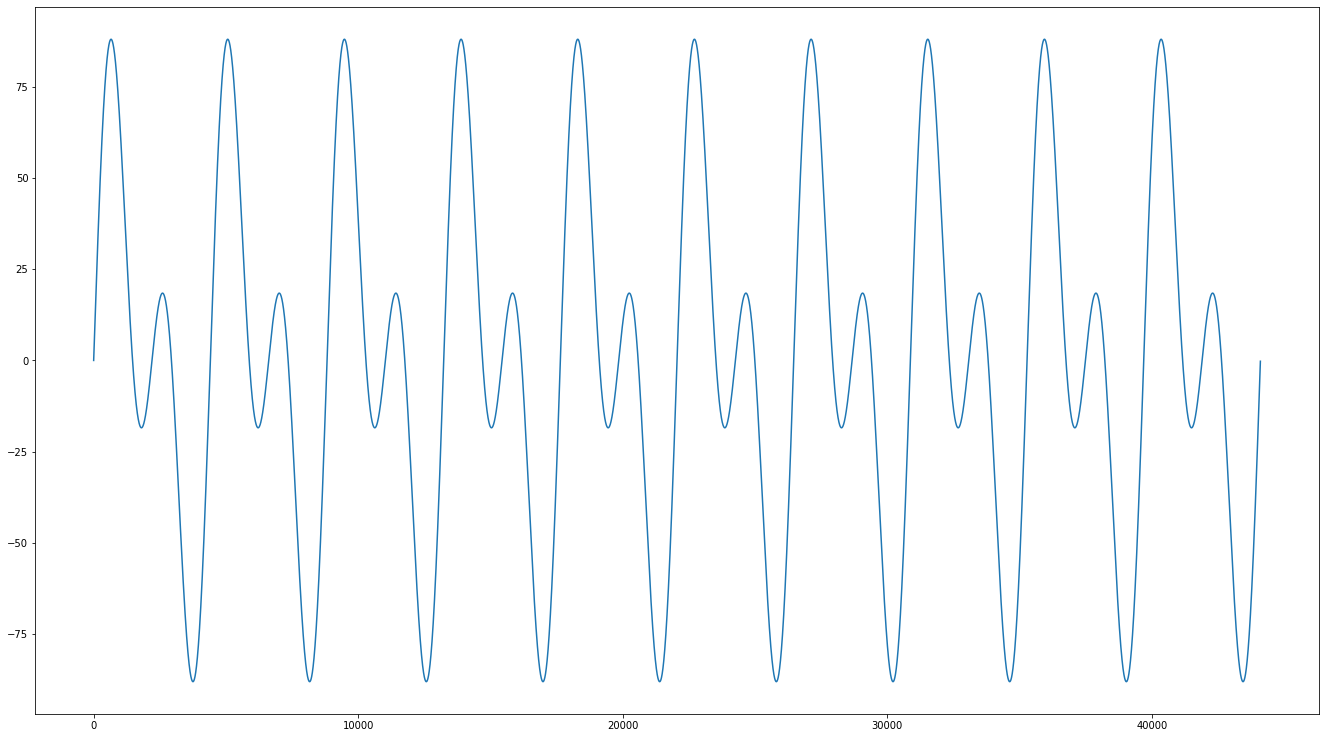

In [8]:
plt.figure(figsize=(23,13))
plt.plot(x,y)

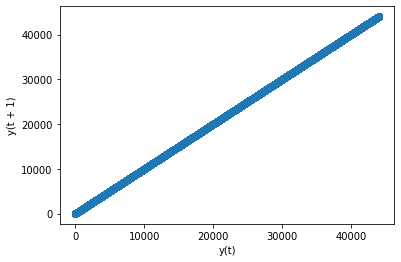

In [9]:
df = get_dataframe(x,y)
lag_plot(df)

In [81]:
np.corrcoef(x, y)

array([[ 1.        , -0.08269931],
       [-0.08269931,  1.        ]])

In [82]:
lost_samples_count = 512
train, test = y[1:len(x) - 1024], y[len(x)-1024:]

In [83]:
print(f'train shape: {train.shape}, test shape: {test.shape}')

train shape: (43075,), test shape: (1024,)


In [84]:
model = AR(train)
fitted_model = model.fit()

In [85]:
print(f'Lag: {fitted_model.k_ar}')
print(f'Coefficients: {fitted_model.params}')

Lag: 55
Coefficients: [-1.11022302e-15  3.40292454e-01  2.20340490e-01  1.52835846e-01
  1.55969501e-01  1.67519212e-01  1.47853374e-01  1.00924969e-01
  6.83704615e-02  7.70196915e-02  8.19120407e-02  3.43186855e-02
 -4.08091545e-02 -9.94443893e-02 -8.99717808e-02 -2.61890888e-02
  2.27830410e-02  1.96560621e-02 -2.83473134e-02 -8.39987993e-02
 -9.87633467e-02 -7.69307017e-02 -5.92948198e-02 -6.22444153e-02
 -7.63344765e-02 -5.49488068e-02  4.80198860e-03  4.01420593e-02
  9.86373425e-03 -6.08015060e-02 -1.06753349e-01 -7.33947754e-02
  5.91289997e-03  5.79446554e-02  6.05154037e-02  3.14742327e-02
  1.59074068e-02  2.69749165e-02  3.51765156e-02  2.23635435e-02
  3.22818756e-04 -8.89205933e-03  3.23755741e-02  9.87796783e-02
  1.26576424e-01  8.92862082e-02  3.64828110e-03 -5.29429913e-02
 -3.44427824e-02  1.32253766e-02  3.07104588e-02  7.37476349e-03
 -3.18156481e-02 -4.00342941e-02 -3.16519737e-02 -6.52654171e-02]


In [91]:
predictions = fitted_model.predict(start=len(train), end=len(train) + len(test) - 1, dynamic = True)

In [92]:
for i in range(len(predictions)):
	print(f'predicted={predictions[i]}, expected={test[i]}')

predicted=-60.77373189311272, expected=-60.778919327207745
predicted=-60.902832388974055, expected=-60.90979901906135
predicted=-61.03175766008253, expected=-61.040486678150565
predicted=-61.16045366674237, expected=-61.17098119398456
predicted=-61.28865866407951, expected=-61.30128145702675
predicted=-61.41622452469141, expected=-61.431386358703904
predicted=-61.54317859463352, expected=-61.561294791414596
predicted=-61.66962819382158, expected=-61.69100564854024
predicted=-61.79555481169744, expected=-61.820517824452885
predicted=-61.92075111835852, expected=-61.94983021452303
predicted=-62.045099750643914, expected=-62.078941715130604
predicted=-62.16874681730744, expected=-62.20785122367276
predicted=-62.291895986152376, expected=-62.33655763857554
predicted=-62.414628556965724, expected=-62.465059859299046
predicted=-62.53671256777939, expected=-62.59335678634901
predicted=-62.65777957113676, expected=-62.72144732128531
predicted=-62.77766596559046, expected=-62.84933036673028
pre

In [93]:
error = mean_squared_error(test, predictions)
np
print(f'Test MSE: {error}')
print('Test MSE: %.3f' % error)

Test MSE: 564393328.3864882
Test MSE: 564393328.386


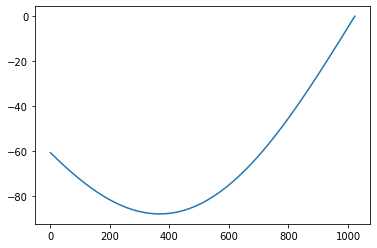

In [94]:
plt.plot(test)

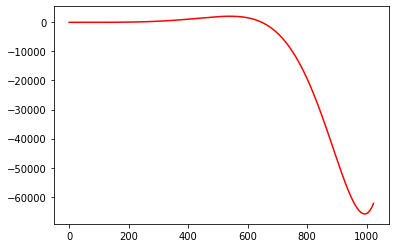

In [97]:

plt.plot(predictions, color='red')
plt.show()

In [98]:
predictions[0]

-60.77373189311272